In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import json
from pathlib import Path

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../src')
from settings import REPLAY_DIR, YOUTUBE_DIR, TIMESTAMPS_DIR
from youtube import convert_to_timestamp
from dota import Match
from highlights import SignalHP

pd.options.display.max_columns = 60

2022-09-04 19:17:45.214 | INFO     | settings:<module>:10 - .env file exists: True
2022-09-04 19:17:45.215 | INFO     | settings:<module>:13 - ROOT_DIR='/home/gosu/dota-highlights'
2022-09-04 19:17:45.216 | INFO     | settings:<module>:19 - REPLAY_DIR='/home/gosu/dota-highlights/replays'
2022-09-04 19:17:45.217 | INFO     | settings:<module>:22 - REDIS_URL='redis://localhost'


In [2]:
match = Match(6676393091, Path(REPLAY_DIR) / '6676393091.jsonlines')
match._parse_events()
match

Match: 6676393091, parsed: True

In [3]:
player = match.players[1]
player

MatchPlayer at match: 6676393091, slot: 1, hero_name: npc_dota_hero_pangolier, steam_id: 76561198134243802

In [4]:
player.hp

-89       580
-88       580
-87       580
-86       580
-85       580
         ... 
 2076    2413
 2077    2430
 2078    2515
 2079    2512
 2080    2490
Name: hp, Length: 2170, dtype: int64

In [5]:
player.hp.t(15 * 60, 16 * 60)

900    1250
901    1250
902    1238
903    1239
904    1278
       ... 
956    1290
957    1290
958    1290
959    1258
960    1138
Name: hp, Length: 61, dtype: int64

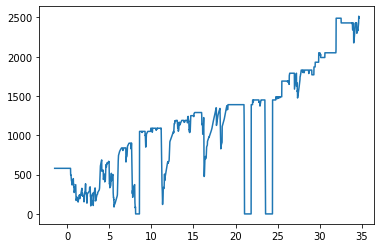

In [6]:
plt.plot(player.hp.index / 60, player.hp)

## Deaths

In [7]:
player.deaths

,time,type,value,attackername,targetname,sourcename,targetsourcename,attackerhero,targethero,attackerillusion,targetillusion,inflictor
0,487,DOTA_COMBATLOG_DEATH,131,npc_dota_hero_ember_spirit,npc_dota_hero_pangolier,npc_dota_hero_ember_spirit,npc_dota_hero_pangolier,True,True,False,False,dota_unknown
1,1263,DOTA_COMBATLOG_DEATH,22,npc_dota_hero_skywrath_mage,npc_dota_hero_pangolier,npc_dota_hero_skywrath_mage,npc_dota_hero_pangolier,True,True,False,False,skywrath_mage_mystic_flare
2,1412,DOTA_COMBATLOG_DEATH,237,npc_dota_hero_luna,npc_dota_hero_pangolier,npc_dota_hero_luna,npc_dota_hero_pangolier,True,True,False,False,luna_lucent_beam


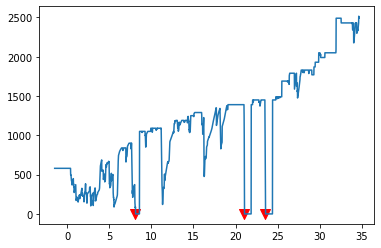

In [8]:
fig, ax = plt.subplots()
ax.plot(player.hp.index / 60, player.hp)
ax.scatter(x=player.deaths['time'] / 60, y=np.full(player.deaths.shape[0], 0), color='r', marker='v', s=100)
plt.show()

## YouTube

In [9]:
df_youtube = pd.read_csv(YOUTUBE_DIR / 'XTngObUROMo.csv')
df_youtube

,video_id,cluster,start,end,start_time,end_time
0,XTngObUROMo,0,00:19,00:02,19,2
1,XTngObUROMo,1,01:00,01:19,60,79
2,XTngObUROMo,2,02:38,03:14,158,194
3,XTngObUROMo,3,04:30,05:35,270,335
4,XTngObUROMo,4,14:19,14:56,859,896
5,XTngObUROMo,5,15:53,16:13,953,973
6,XTngObUROMo,6,18:06,18:13,1086,1093
7,XTngObUROMo,7,18:47,18:56,1127,1136
8,XTngObUROMo,8,21:11,21:47,1271,1307
9,XTngObUROMo,9,22:34,24:25,1354,1465


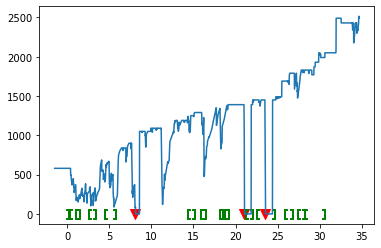

In [10]:
fig, ax = plt.subplots()
ax.plot(player.hp.index / 60, player.hp)
ax.scatter(x=player.deaths['time'] / 60, y=np.full(player.deaths.shape[0], 0), color='r', marker='v', s=100)
ax.scatter(x=df_youtube['start_time'] / 60, y=np.full(df_youtube.shape[0], 0), color='g', marker='$[$', s=100)
ax.scatter(x=df_youtube['end_time'] / 60, y=np.full(df_youtube.shape[0], 0), color='g', marker='$]$', s=100)
plt.show()

## Remove trend

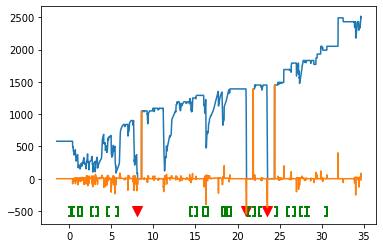

In [11]:
fig, ax = plt.subplots()
ax.plot(player.hp.index / 60, player.hp)
ax.plot(player.dhp.index / 60, player.dhp)
ax.scatter(x=player.deaths['time'] / 60, y=np.full(player.deaths.shape[0], -500), color='r', marker='v', s=100)
ax.scatter(x=df_youtube['start_time'] / 60, y=np.full(df_youtube.shape[0], -500), color='g', marker='$[$', s=100)
ax.scatter(x=df_youtube['end_time'] / 60, y=np.full(df_youtube.shape[0], -500), color='g', marker='$]$', s=100)
plt.show()

## Zoom

In [12]:
# 11:09 - 11:30

In [13]:
zoom_start = 10.5 * 60
zoom_end = 12 * 60
df_youtube_slice = df_youtube[(df_youtube['start_time'] >= zoom_start) & (df_youtube['end_time'] <= zoom_end)]

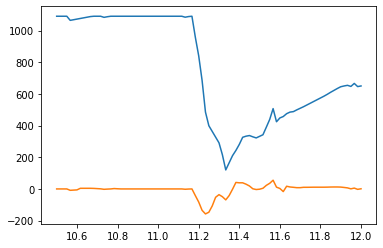

In [14]:
fig, ax = plt.subplots()
ax.plot(player.hp.t(zoom_start, zoom_end).index / 60, player.hp.t(zoom_start, zoom_end))
ax.plot(player.sdhp.t(zoom_start, zoom_end).index / 60, player.sdhp.t(zoom_start, zoom_end))
ax.scatter(
    x=player.deaths.t(zoom_start, zoom_end)['time'] / 60, 
    y=np.full(player.deaths.t(zoom_start, zoom_end).shape[0], -500),
    color='r', marker='v', s=100)
ax.scatter(x=df_youtube_slice['start_time'] / 60, y=np.full(df_youtube_slice.shape[0], -500), color='g', marker='$[$', s=100)
ax.scatter(x=df_youtube_slice['end_time'] / 60, y=np.full(df_youtube_slice.shape[0], -500), color='g', marker='$]$', s=100)
plt.show()

Начало

- Отрицательная скорость (Может медленно убывать)
- Абсолютное значение хп < 30%

Конец
- Начало + 20 сек

In [15]:
from utils import TimeSeries

In [16]:
player.hp / player.max_hp

-89      1.000000
-88      1.000000
-87      1.000000
-86      1.000000
-85      1.000000
           ...   
 2076    0.993004
 2077    1.000000
 2078    1.000000
 2079    0.998807
 2080    0.990060
Name: hp, Length: 2170, dtype: float64

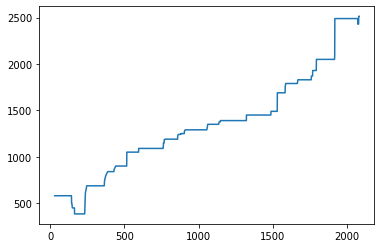

In [17]:
plt.plot(player.hp.rolling(120).max())

In [18]:
signal_sdhp = player.sdhp < -20
signal_sdhp = TimeSeries(signal_sdhp)

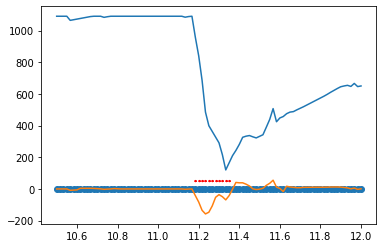

In [20]:
fig, ax = plt.subplots()
ax.plot(player.hp.t(zoom_start, zoom_end).index / 60, player.hp.t(zoom_start, zoom_end))
ax.plot(player.sdhp.t(zoom_start, zoom_end).index / 60, player.sdhp.t(zoom_start, zoom_end))
ax.scatter(
    x=player.deaths.t(zoom_start, zoom_end)['time'] / 60, 
    y=np.full(player.deaths.t(zoom_start, zoom_end).shape[0], -500),
    color='r', marker='v', s=100)
ax.scatter(x=df_youtube_slice['start_time'] / 60, y=np.full(df_youtube_slice.shape[0], -500), color='g', marker='$[$', s=100)
ax.scatter(x=df_youtube_slice['end_time'] / 60, y=np.full(df_youtube_slice.shape[0], -500), color='g', marker='$]$', s=100)
ax.scatter(x=signal_sdhp.t(zoom_start, zoom_end).index / 60, y=signal_sdhp.t(zoom_start, zoom_end) * 50, color='r', marker='$*$', s=5)
ax.scatter(x=signal_sdhp.t(zoom_start, zoom_end).index / 60, y=signal_sdhp.t(zoom_start, zoom_end))
plt.show()

# Detector

## Signal HP

In [21]:
sdhp_signal = SignalHP(player).get_negative_hp_trend()
max_hp_signal = SignalHP(player).get_low_hp()

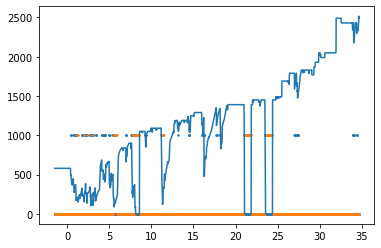

In [33]:
fig, ax = plt.subplots()
ax.plot(player.hp.index / 60, player.hp)
# ax.plot(player.dhp.index / 60, player.dhp)
# ax.scatter(x=player.deaths['time'] / 60, y=np.full(player.deaths.shape[0], -500), color='r', marker='v', s=100)
# ax.scatter(x=df_youtube['start_time'] / 60, y=np.full(df_youtube.shape[0], -500), color='g', marker='$[$', s=100)
# ax.scatter(x=df_youtube['end_time'] / 60, y=np.full(df_youtube.shape[0], -500), color='g', marker='$]$', s=100)
ax.scatter(x=sdhp_signal.index / 60, y=sdhp_signal * 1000, s=2)
ax.scatter(x=max_hp_signal.index / 60, y=max_hp_signal * 1000, s=1)
plt.show()

In [44]:
asd = sdhp_signal.astype(int) + max_hp_signal.astype(int)
asd[asd == 2]

64      2
120     2
121     2
122     2
141     2
168     2
186     2
334     2
335     2
336     2
465     2
467     2
482     2
483     2
484     2
485     2
488     2
489     2
490     2
678     2
679     2
680     2
681     2
1264    2
1265    2
1266    2
1413    2
1414    2
1415    2
dtype: int64

In [60]:
moments = [dict()]
prev_flag = False

for (time, flag), (time_hp, flag_hp) in zip(
    signal_sdhp.iteritems(),
    max_hp_signal.iteritems()
):
    
    last_moment = moments[-1]
    
    if flag == True and prev_flag == False:
        last_moment['start'] = time
    
    if flag == False and prev_flag == True:
        last_moment['end'] = time
        moments.append(dict())
        
    if flag_hp and 'end' not in last_moment:
        last_moment['zaebis'] = True
        
    prev_flag = flag

In [61]:
334 / 60

5.566666666666666

In [62]:
moments    

[{'start': 25, 'end': 28},
 {'start': 47, 'end': 48},
 {'start': 49, 'end': 52},
 {'start': 62, 'zaebis': True, 'end': 66},
 {'zaebis': True, 'start': 106, 'end': 109},
 {'start': 120, 'zaebis': True, 'end': 123},
 {'start': 133, 'end': 136},
 {'start': 140, 'zaebis': True, 'end': 143},
 {'start': 165, 'zaebis': True, 'end': 171},
 {'start': 185, 'zaebis': True, 'end': 188},
 {'start': 202, 'end': 205},
 {'start': 247, 'end': 250},
 {'start': 258, 'end': 261},
 {'start': 268, 'end': 271},
 {'start': 300, 'end': 303},
 {'start': 328, 'end': 331},
 {'zaebis': True, 'start': 334, 'end': 337},
 {'zaebis': True, 'start': 419, 'end': 422},
 {'start': 456, 'end': 457},
 {'start': 460, 'zaebis': True, 'end': 468},
 {'start': 482, 'zaebis': True, 'end': 486},
 {'zaebis': True, 'start': 488, 'end': 491},
 {'zaebis': True, 'start': 558, 'end': 561},
 {'start': 671, 'zaebis': True, 'end': 682},
 {'zaebis': True, 'start': 788, 'end': 789},
 {'start': 868, 'end': 872},
 {'start': 960, 'end': 963},
 

In [59]:
788 / 60

13.133333333333333